# **BRAIN TUMOR DETECTION USING ML AND CNN ALGORITHMS**

## Import **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D, BatchNormalization,Dropout,Input
from keras.models import Sequential
from keras.preprocessing import image_dataset_from_directory
##from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras.optimizers import Adam

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Create a dictionary to map class labels to numeric values
classes = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

## **Data Preparation**

In [4]:
X = []  # List to store images
Y = []  # List to store corresponding labels

# Iterate through each class in the 'classes' list
for cls in classes:
    # Construct the path to the directory for the current class in the training set
    train_path = '/content/drive/MyDrive/Training/' + cls

    # Iterate through each file in the training directory
    for j in os.listdir(train_path):
        # Read the image in grayscale
        img = cv2.imread(os.path.join(train_path, j), 0)

        # Resize the image to (224, 224)
        img = cv2.resize(img, (224, 224))

        # Append the processed image to the 'X' list
        X.append(img)

        # Append the label corresponding to the current class to the 'Y' list
        Y.append(classes[cls])

    # Construct the path to the directory for the current class in the testing set
    test_path = '/content/drive/MyDrive/Testing/' + cls

    # Iterate through each file in the testing directory
    for j in os.listdir(test_path):
        # Read the image in grayscale
        img = cv2.imread(os.path.join(test_path, j), 0)

        # Resize the image to (224, 224)
        img = cv2.resize(img, (224, 224))

        # Append the processed image to the 'X' list
        X.append(img)

        # Append the label corresponding to the current class to the 'Y' list
        Y.append(classes[cls])




## **Exploratory Data Analysis**

In [5]:

# Convert lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)

In [6]:

print(X.shape)

(3264, 224, 224)


In [7]:

print(Y.shape)

(3264,)


In [8]:
# Convert the NumPy array to a Pandas Series and then use value_counts
value_counts_result = pd.Series(Y).value_counts()
print(value_counts_result)

2    937
1    926
3    901
0    500
Name: count, dtype: int64


In [9]:
# Upsample the data using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, Y = ros.fit_resample(X.reshape(len(X), -1), Y)

# Reshape the features back to images
X = X.reshape(-1, 224, 224)


In [10]:
# Convert the NumPy array to a Pandas Series and then use value_counts
value_counts_result = pd.Series(Y).value_counts()
print(value_counts_result)

0    937
1    937
2    937
3    937
Name: count, dtype: int64


In [11]:
# Now, X and Y are NumPy arrays and can be used in NumPy operations
print(X.shape)   # Shape of the array (number of images, height, width) for example
print(Y.shape)

(3748, 224, 224)
(3748,)


In [12]:

# Y is a NumPy array containing labels
unique_labels = np.unique(Y)
print(unique_labels)

[0 1 2 3]


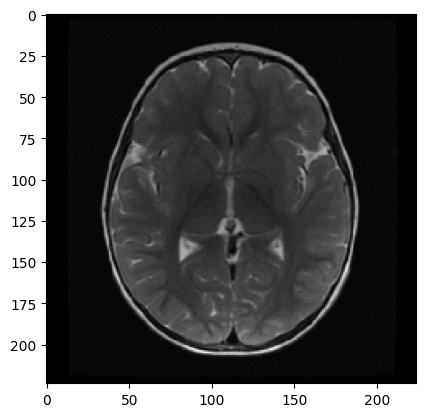

In [13]:
# Visualize the first image
plt.imshow(X[0], cmap='gray')

## **Image Flattening**

In [14]:
# Flatten the images
X_flat = X.reshape(len(X), -1)

In [15]:

print("Original Image:")
print(X[0])
print("\nFlattened Image:")
print(X_flat[0])

Original Image:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Flattened Image:
[0 0 0 ... 0 0 0]


## **Train-Test Split**

In [16]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

In [17]:

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2998, 50176)
(2998,)
(750, 50176)
(750,)


In [18]:
# Check the maximum and minimum values of the original data
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0


In [19]:

# Create a StandardScaler and fit-transform the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the same scaler to the testing data
X_test = scaler.transform(X_test)

## **Data Normalization**

In [20]:

# Check the maximum and minimum values after Data Normalization
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

33.294393370921036 -2.6621731629234455
40.23930194437648 -2.695032597243009


## **Machine Learning Algorithms**

# **Model Selection and Evaluation**

## **Model 1: Support Vector Machine Classifer (SVM)**

In [ ]:

# Create an SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

SVC()

In [ ]:

# Predictions on the training set
train_pred_svm = svm_classifier.predict(X_train)

# Predictions on the testing set
test_pred_svm = svm_classifier.predict(X_test)


## **Model Evaluation for SVM**

### **Accuracy Score**

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_svm = accuracy_score(Y_train, train_pred_svm)
print("Training Accuracy:", train_accuracy_svm)

# Evaluate accuracy on the testing set
test_accuracy_svm = accuracy_score(Y_test, test_pred_svm)
print("Testing Accuracy:", test_accuracy_svm)

Training Accuracy: 0.9579719813208806
Testing Accuracy: 0.8746666666666667


### **Classfication Report**

In [ ]:

print("\nSVM Classification Report:")
print(classification_report(Y_test, test_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       214
           1       0.84      0.82      0.83       182
           2       0.80      0.78      0.79       179
           3       0.93      0.93      0.93       175

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



### **Confusion Matrix**

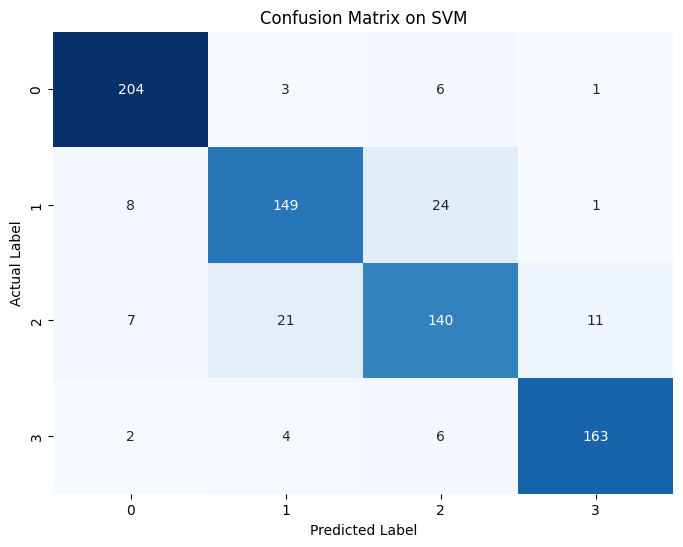

In [ ]:
# Calculate the confusion matrix
conf_mat_svm = confusion_matrix(Y_test, test_pred_svm)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on SVM')
plt.show()

## **Model Predictions on SVM**

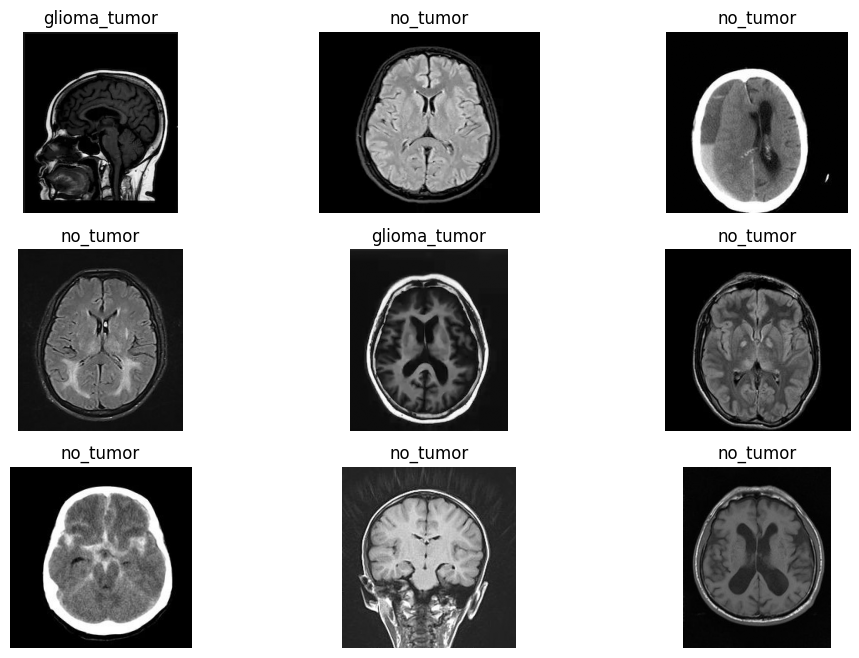

In [ ]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}


# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/MyDrive/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()


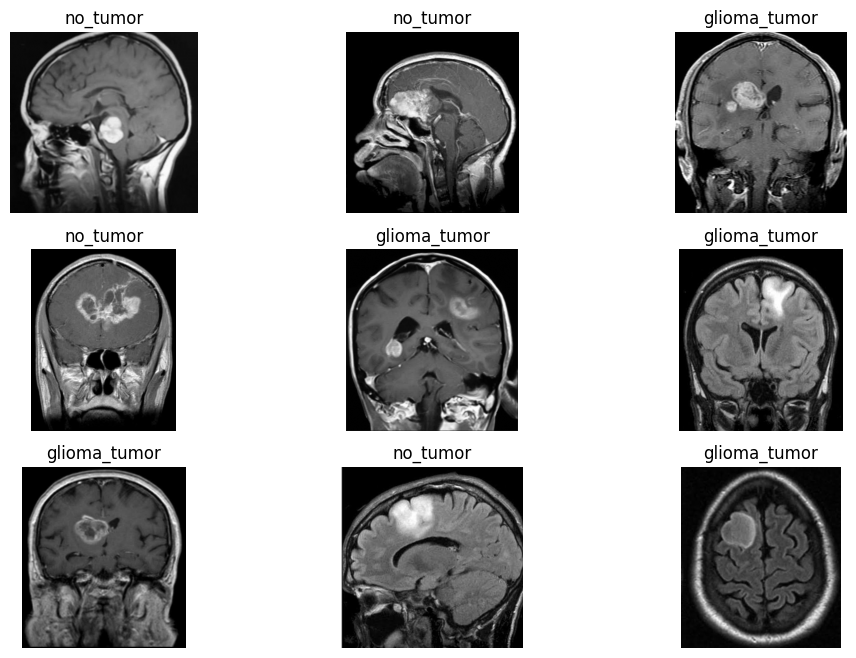

In [ ]:

# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/MyDrive/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

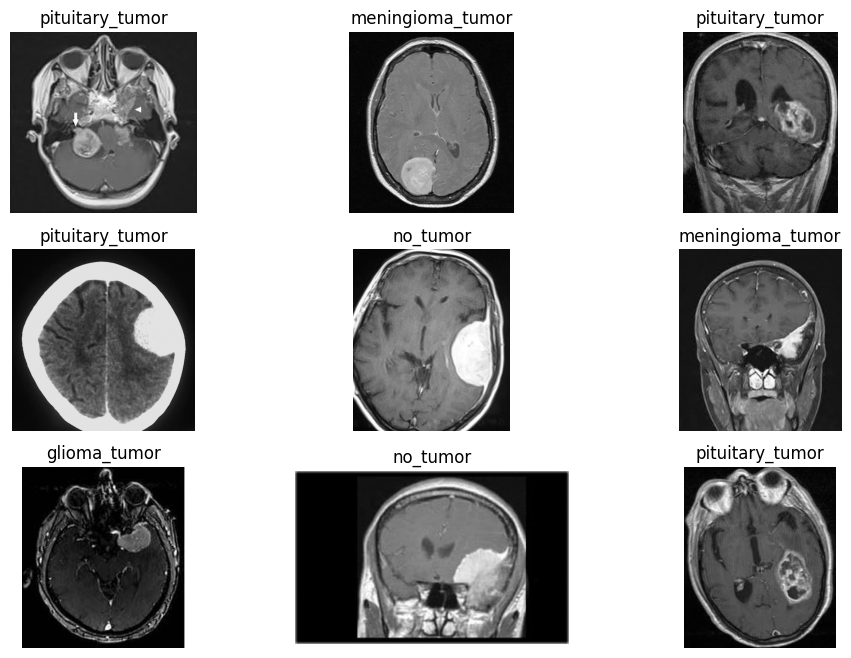

In [ ]:

# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/MyDrive/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

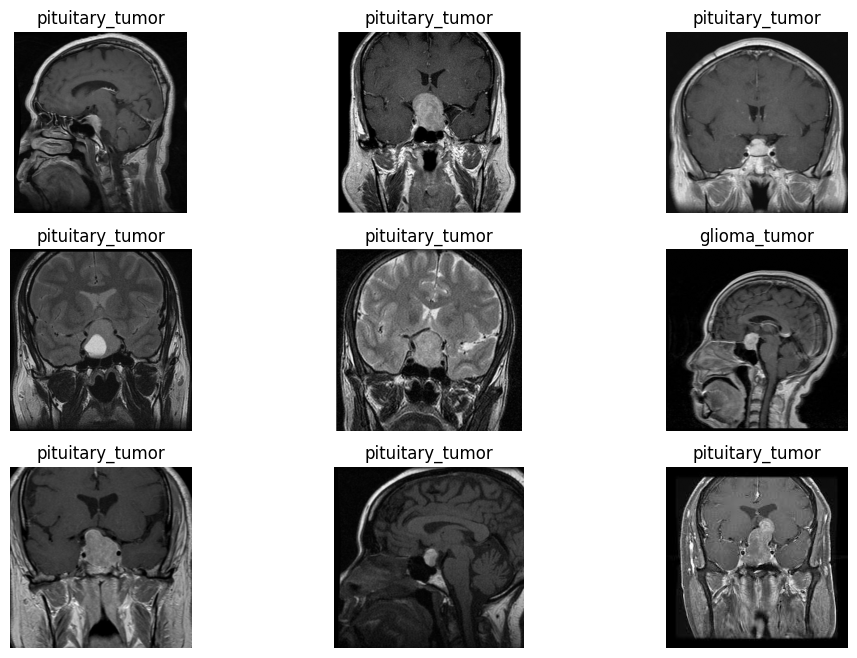

In [ ]:

# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/MyDrive/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = svm_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()


## **Model 2: Gaussian Naive Bayes Classifier**

In [ ]:

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes classifier on the training data
nb_classifier.fit(X_train, Y_train)


GaussianNB()

In [ ]:

# Predictions on the training set
train_pred_nb = nb_classifier.predict(X_train)

# Predictions on the testing set
test_pred_nb = nb_classifier.predict(X_test)

## **Model Evaluation for Naive Bayes**

### **Accuracy Score**

In [ ]:

# Evaluate accuracy on the training set
train_accuracy_nb = accuracy_score(Y_train, train_pred_nb)
print("Training Accuracy:", train_accuracy_nb)

# Evaluate accuracy on the testing set
test_accuracy_nb = accuracy_score(Y_test, test_pred_nb)
print("Testing Accuracy:", test_accuracy_nb)


Training Accuracy: 0.5360240160106737
Testing Accuracy: 0.5106666666666667


### **Classification Report**

In [ ]:

print("\nNaive Bayes Classification Report:")
print(classification_report(Y_test, test_pred_nb))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.50      0.58       214
           1       0.39      0.85      0.54       182
           2       0.28      0.09      0.14       179
           3       0.75      0.60      0.67       175

    accuracy                           0.51       750
   macro avg       0.52      0.51      0.48       750
weighted avg       0.53      0.51      0.48       750



### **Confusion Matrix**

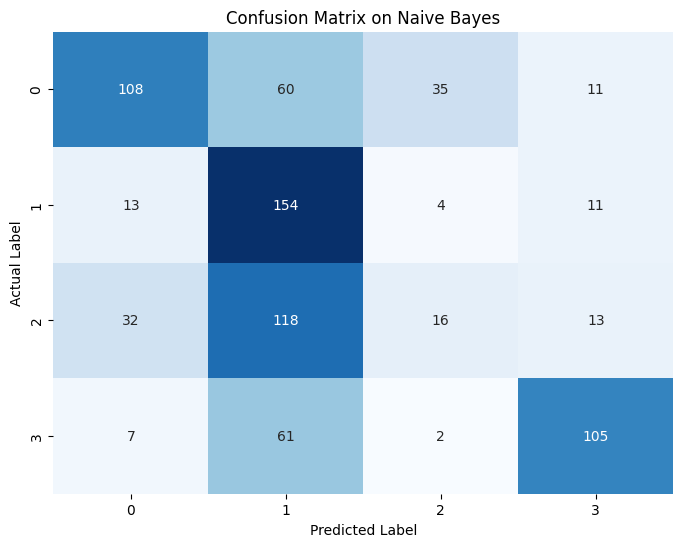

In [ ]:

# Calculate the confusion matrix
conf_mat_nb = confusion_matrix(Y_test, test_pred_nb)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Naive Bayes')
plt.show()


## **Model 3: Decistion Tree Classifer**

In [ ]:

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:

# Make predictions on the training set
train_pred_dt = dt_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_dt = dt_classifier.predict(X_test)

## **Model Evaluation on Decision Tree**

### **Accuracy Score**

In [ ]:

# Evaluate accuracy on the training set
train_accuracy_dt = accuracy_score(Y_train, train_pred_dt)
print("Training Accuracy:", train_accuracy_dt)

# Evaluate accuracy on the testing set
test_accuracy_dt = accuracy_score(Y_test, test_pred_dt)
print("Testing Accuracy:", test_accuracy_dt)


Training Accuracy: 1.0
Testing Accuracy: 0.8133333333333334


### **Classification Report**

In [ ]:
print("\nDecision Tree Classification Report:")
print(classification_report(Y_test, test_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       214
           1       0.78      0.76      0.77       182
           2       0.71      0.73      0.72       179
           3       0.83      0.84      0.83       175

    accuracy                           0.81       750
   macro avg       0.81      0.81      0.81       750
weighted avg       0.81      0.81      0.81       750



### **Confusion Matrix**

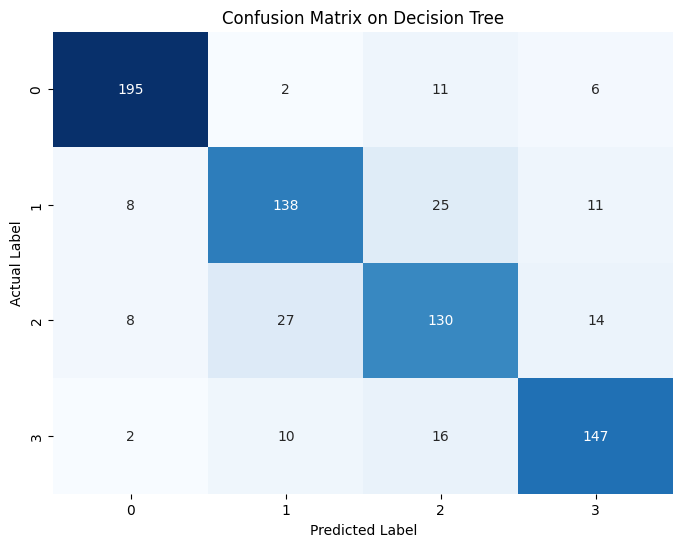

In [ ]:
# Confusion Matrix
conf_mat_rf = confusion_matrix(Y_test, test_pred_dt)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Decision Tree')
plt.show()

### **Model 4: Random Forest classifier**

In [ ]:

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100,
                                       random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the training set
train_pred_rf = rf_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_rf = rf_classifier.predict(X_test)

### **Model Evaluation on Random Forest**

### **Accuracy Score**

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_rf = accuracy_score(Y_train, train_pred_rf)
print("Training Accuracy:", train_accuracy_rf)

# Evaluate accuracy on the testing set
test_accuracy_rf = accuracy_score(Y_test, test_pred_rf)
print("Testing Accuracy:", test_accuracy_rf)

Training Accuracy: 1.0
Testing Accuracy: 0.9013333333333333


### **Classification Report**

In [ ]:

print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, test_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       214
           1       0.95      0.80      0.87       182
           2       0.84      0.86      0.85       179
           3       0.91      0.95      0.93       175

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.90      0.90       750



### C**onfusion Matrix**

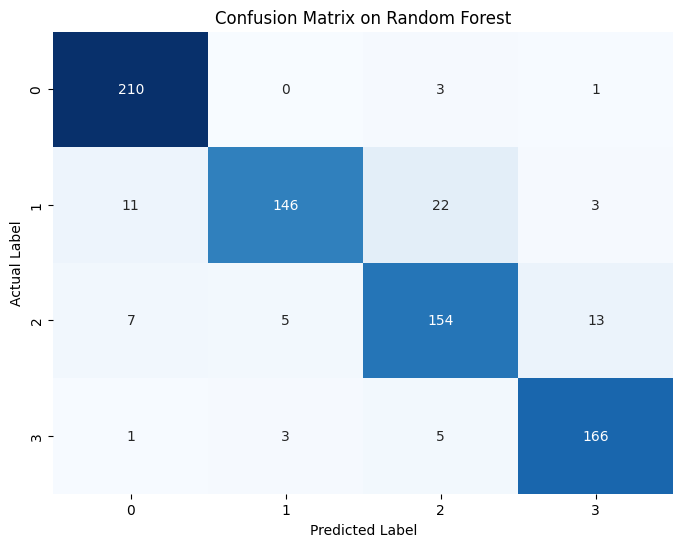

In [ ]:
# Confusion Matrix
conf_mat_rf = confusion_matrix(Y_test, test_pred_rf)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Random Forest')
plt.show()

## **Model 5: k-Nearest Neighbors (KNN) Classifier**

In [ ]:

# Create a KNN classifier (you can choose the value of k)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:

# Make predictions on the training set
train_pred_knn = knn_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_knn = knn_classifier.predict(X_test)

## **Model Evaluation on KNN**

### **Accuracy Score**

In [ ]:

# Evaluate accuracy on the training set
train_accuracy_knn = accuracy_score(Y_train, train_pred_knn)
print("Training Accuracy:", train_accuracy_knn)

# Evaluate accuracy on the testing set
test_accuracy_knn = accuracy_score(Y_test, test_pred_knn)
print("Testing Accuracy:", test_accuracy_knn)


Training Accuracy: 0.9556370913942629
Testing Accuracy: 0.8466666666666667


### **Classification Report**

In [ ]:
print("\nKNN Classification Report:")
print(classification_report(Y_test, test_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       214
           1       0.80      0.86      0.83       182
           2       0.93      0.64      0.76       179
           3       0.88      0.97      0.92       175

    accuracy                           0.85       750
   macro avg       0.86      0.84      0.84       750
weighted avg       0.85      0.85      0.84       750



### **Confusion Matrix**

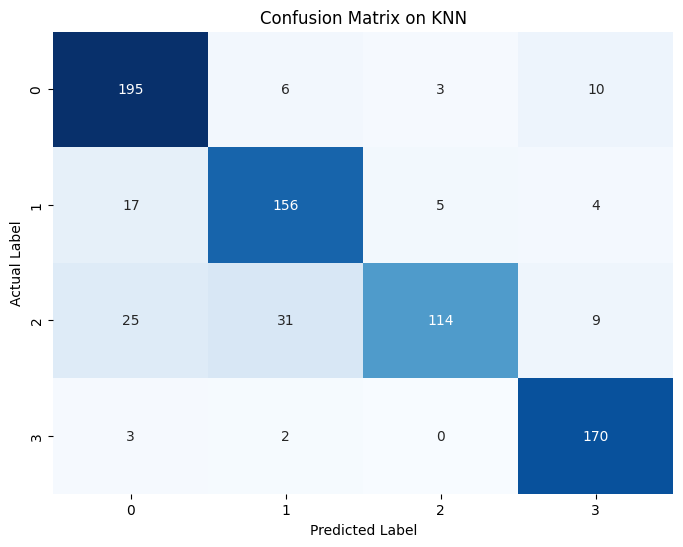

In [ ]:
# Calculate the confusion matrix
conf_mat_knn = confusion_matrix(Y_test, test_pred_knn)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on KNN')
plt.show()

## **Model 6: Logistic Regression**

In [ ]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:

# Make predictions on the training set
train_pred_lr = logreg_model.predict(X_train)

# Make predictions on the testing set
test_pred_lr = logreg_model.predict(X_test)

## **Model Evaluation on Logistic Regression**

### **Accuracy Score**

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_lr = accuracy_score(Y_train, train_pred_lr)
print("Training Accuracy:", train_accuracy_lr)

# Evaluate accuracy on the testing set
test_accuracy_lr = accuracy_score(Y_test, test_pred_lr)
print("Testing Accuracy:", test_accuracy_lr)

Training Accuracy: 1.0
Testing Accuracy: 0.836


### **Classification Report**

In [ ]:
print("\nLogistic Regression Classification Report:")
print(classification_report(Y_test, test_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       214
           1       0.78      0.81      0.79       182
           2       0.77      0.66      0.71       179
           3       0.90      0.95      0.93       175

    accuracy                           0.84       750
   macro avg       0.83      0.83      0.83       750
weighted avg       0.83      0.84      0.83       750



### **Confusion Matrix**

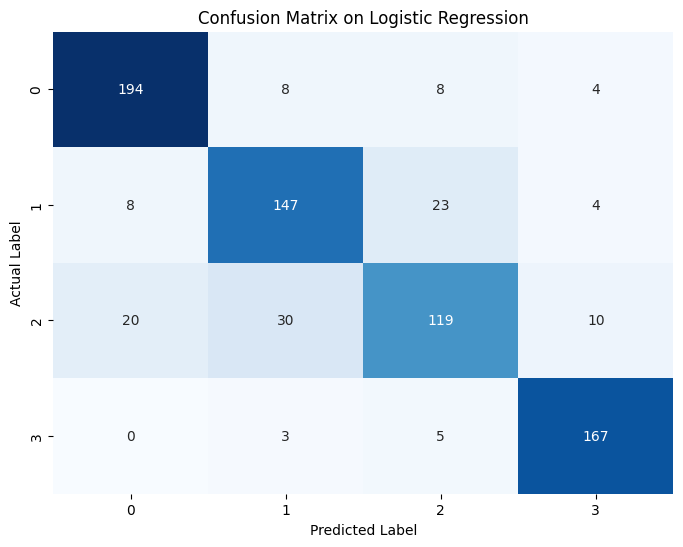

In [ ]:
# Calculate the Confusion Matrix
conf_mat_lr = confusion_matrix(Y_test, test_pred_lr)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on Logistic Regression')
plt.show()

## **Model 7: XGBoost Classifer**

In [ ]:
# Create an XGBoost classifier
#xgb_classifier = XGBClassifier()
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=3, nthread=-1)

# Train the model on the training data
xgb_classifier.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [ ]:
# Make predictions on the training set
train_pred_xgb = xgb_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_xgb = xgb_classifier.predict(X_test)

## **Model Evaluation on XGBoost**

### **Accuracy Score**

In [ ]:
# Evaluate accuracy on the training set
train_accuracy_xgb = accuracy_score(Y_train, train_pred_xgb)
print("Training Accuracy:", train_accuracy_xgb)

# Evaluate accuracy on the testing set
test_accuracy_xgb = accuracy_score(Y_test, test_pred_xgb)
print("Testing Accuracy:", test_accuracy_xgb)

Training Accuracy: 1.0
Testing Accuracy: 0.9093333333333333


### **Classification Report**

In [ ]:
print("\nXGBoost Classification Report:")
print(classification_report(Y_test, test_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       214
           1       0.92      0.85      0.89       182
           2       0.87      0.85      0.86       179
           3       0.91      0.97      0.94       175

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750



### **Confusion Matrix**

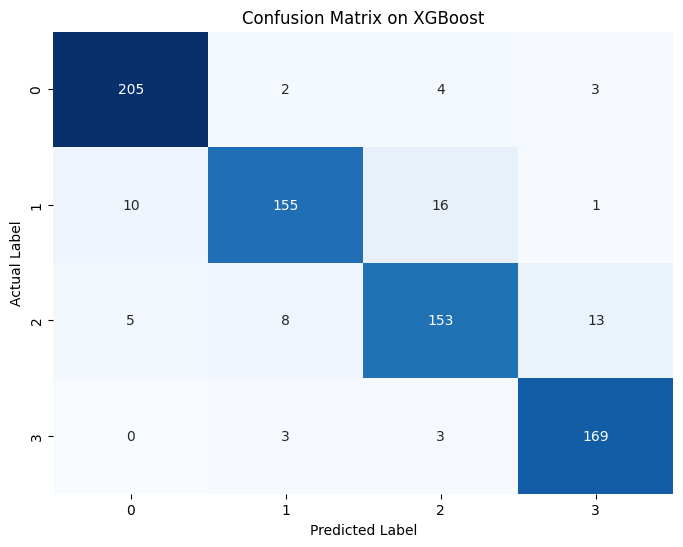

In [ ]:
# Confusion Matrix
conf_mat_xgb = confusion_matrix(Y_test, test_pred_xgb)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on XGBoost')
plt.show()

## **Model Predictions on XGBoost**

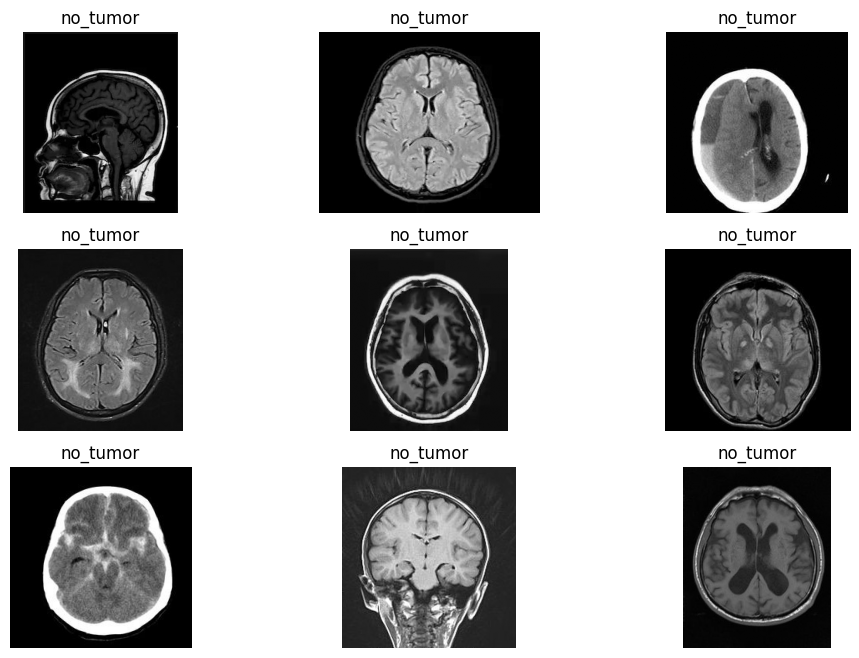

In [ ]:


# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/MyDrive/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

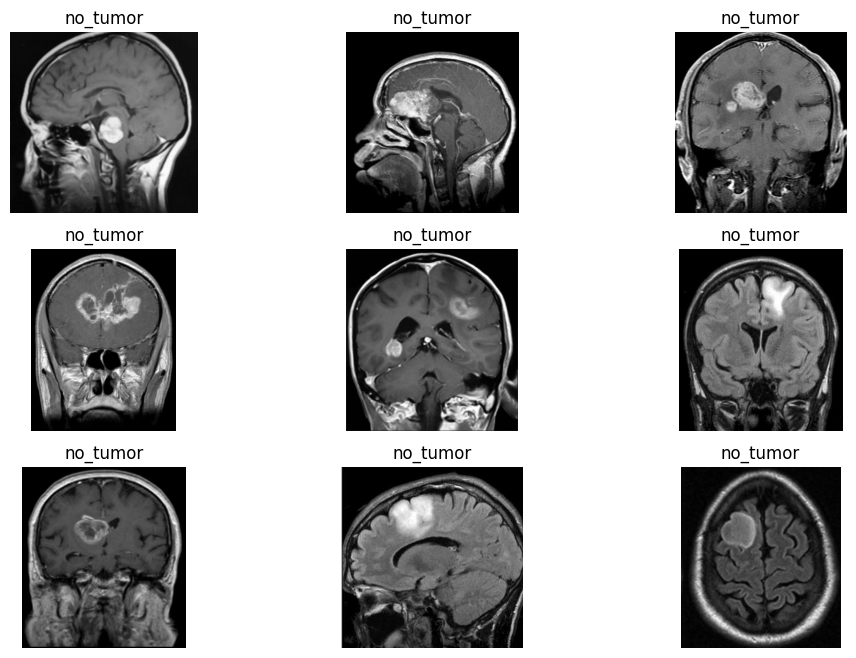

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/MyDrive/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()


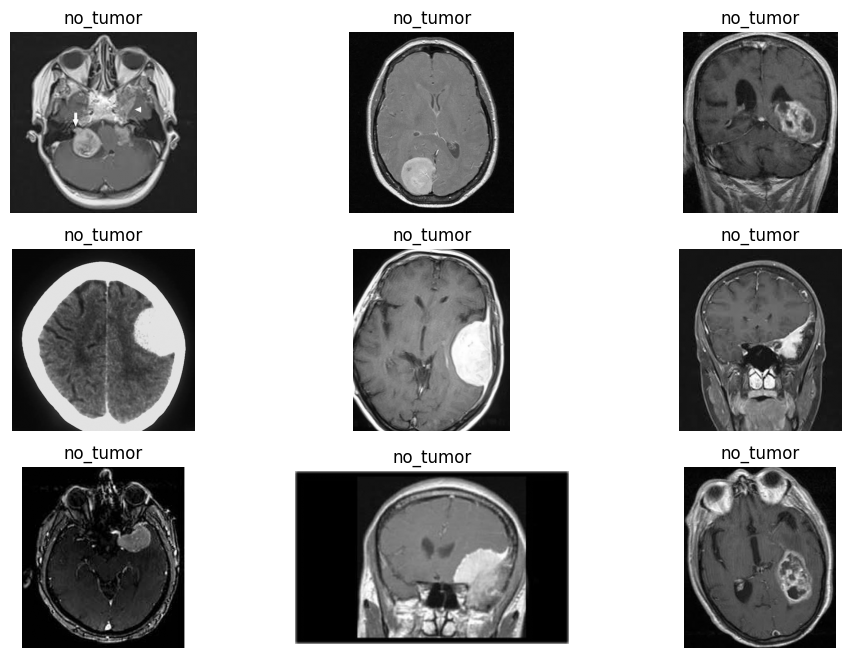

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/MyDrive/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()


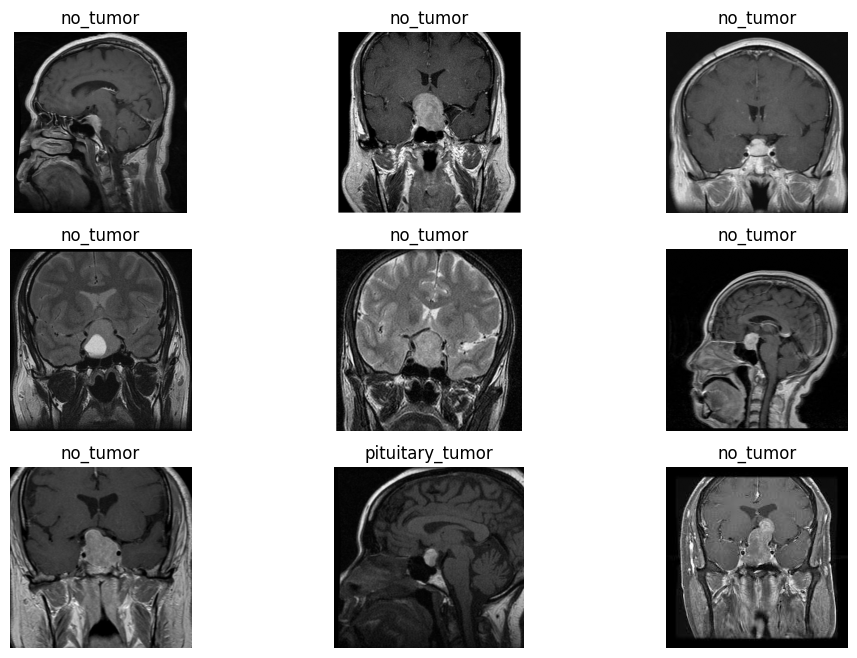

In [ ]:

# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/MyDrive/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = xgb_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()


## **Model 8: MLP CLassifier**

In [21]:
# Initialize MLPClassifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=100,  # Set a fixed number of epochs
    random_state=42,
)


Epoch 1/30, Training Accuracy: 0.9580, Test Accuracy: 0.8387
Epoch 2/30, Training Accuracy: 0.9566, Test Accuracy: 0.8293
Epoch 3/30, Training Accuracy: 0.9823, Test Accuracy: 0.8560
Epoch 4/30, Training Accuracy: 0.9833, Test Accuracy: 0.8400
Epoch 5/30, Training Accuracy: 0.9893, Test Accuracy: 0.8560
Epoch 6/30, Training Accuracy: 0.9820, Test Accuracy: 0.8507
Epoch 7/30, Training Accuracy: 0.9917, Test Accuracy: 0.8613
Epoch 8/30, Training Accuracy: 0.9767, Test Accuracy: 0.8293
Epoch 9/30, Training Accuracy: 0.9713, Test Accuracy: 0.8480
Epoch 10/30, Training Accuracy: 0.9850, Test Accuracy: 0.8533
Epoch 11/30, Training Accuracy: 0.9823, Test Accuracy: 0.8400
Epoch 12/30, Training Accuracy: 0.9396, Test Accuracy: 0.8120
Epoch 13/30, Training Accuracy: 0.9720, Test Accuracy: 0.8427
Epoch 14/30, Training Accuracy: 0.9016, Test Accuracy: 0.7720
Epoch 15/30, Training Accuracy: 0.9757, Test Accuracy: 0.8453
Epoch 16/30, Training Accuracy: 0.8783, Test Accuracy: 0.7707
Epoch 17/30, Trai

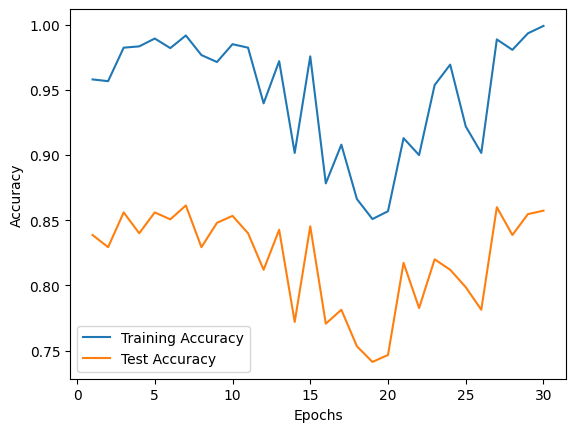

In [23]:

# Training loop without early stopping
train_accuracy_list = []
test_accuracy_list = []

# Define the number of training epochs
epochs = 30

for epoch in range(epochs):
    # Train the model on the training data
    mlp_classifier.partial_fit(X_train, Y_train, classes=np.unique(Y_train))

    # Predictions on the training set
    train_pred_mlp = mlp_classifier.predict(X_train)

    # Predictions on the validation set
    test_pred_mlp = mlp_classifier.predict(X_test)

    # Compute training accuracy and add to the list
    train_accuracy = accuracy_score(Y_train, train_pred_mlp)
    train_accuracy_list.append(train_accuracy)

    # Compute validation accuracy and add to the list
    test_accuracy = accuracy_score(Y_test, test_pred_mlp)
    test_accuracy_list.append(test_accuracy)

    # Print progress
    print(f'Epoch {epoch + 1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy over epochs
plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Make predictions on the training set
train_pred_mlp = mlp_classifier.predict(X_train)

# Make predictions on the testing set
test_pred_mlp = mlp_classifier.predict(X_test)

In [25]:
# Evaluate accuracy on the training set
train_accuracy_mlp = accuracy_score(Y_train, train_pred_mlp)
print("Training Accuracy:", train_accuracy_mlp)

# Evaluate accuracy on the testing set
test_accuracy_mlp = accuracy_score(Y_test, test_pred_mlp)
print("Testing Accuracy:", test_accuracy_mlp)

Training Accuracy: 0.9989993328885924
Testing Accuracy: 0.8573333333333333


In [26]:
print("\nMLP Classification Report:")
print(classification_report(Y_test, test_pred_mlp))


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       214
           1       0.84      0.82      0.83       182
           2       0.81      0.70      0.75       179
           3       0.90      0.95      0.92       175

    accuracy                           0.86       750
   macro avg       0.85      0.85      0.85       750
weighted avg       0.85      0.86      0.85       750



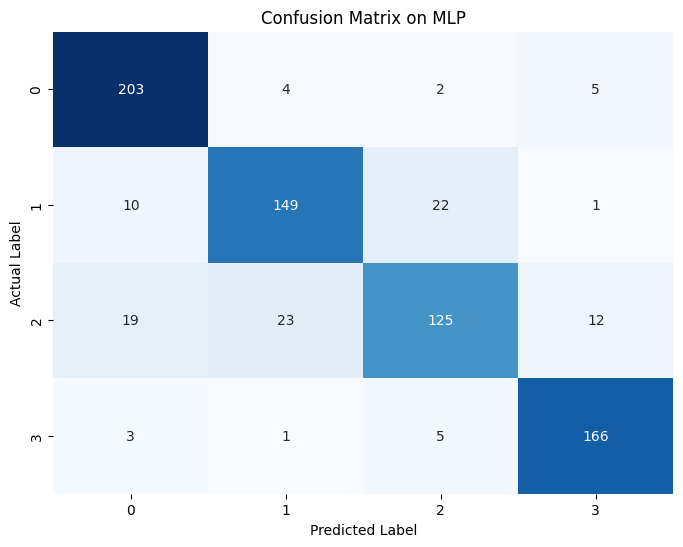

In [27]:
# Confusion Matrix
conf_mat_mlp = confusion_matrix(Y_test, test_pred_mlp)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix on MLP')
plt.show()

In [28]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

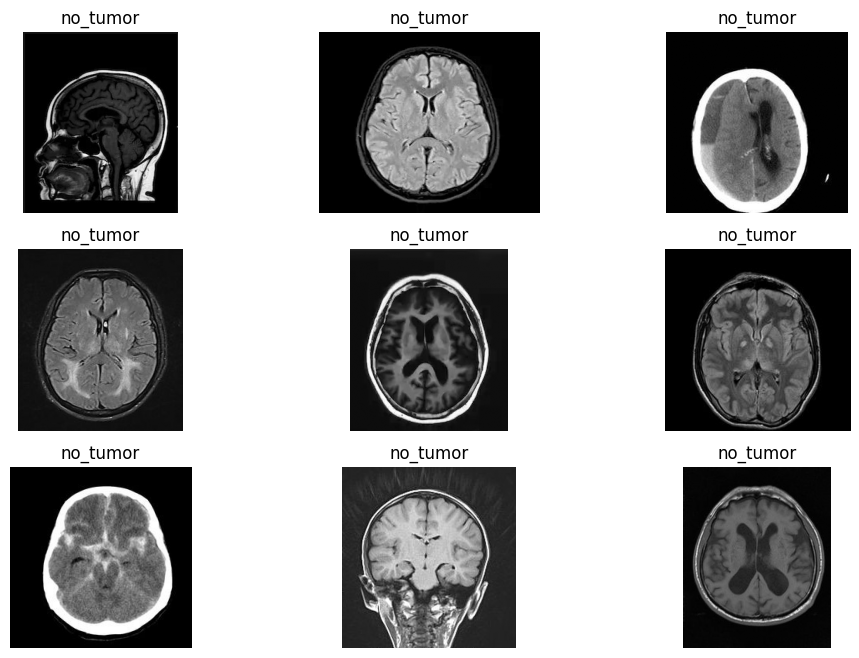

In [29]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/MyDrive/Testing/no_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/no_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

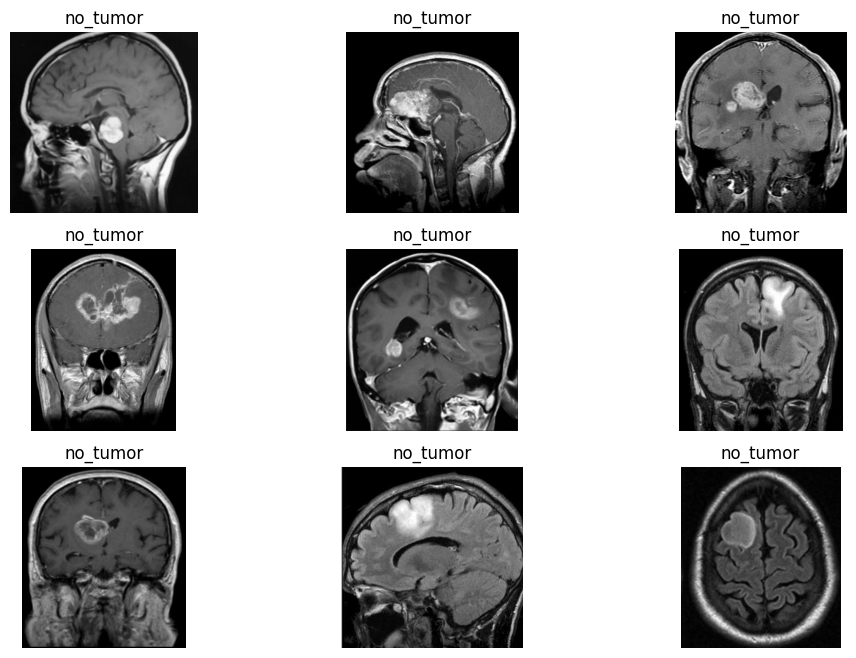

In [30]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'glioma_tumor' testing directory
files_glioma_tumor = os.listdir('/content/drive/MyDrive/Testing/glioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/glioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

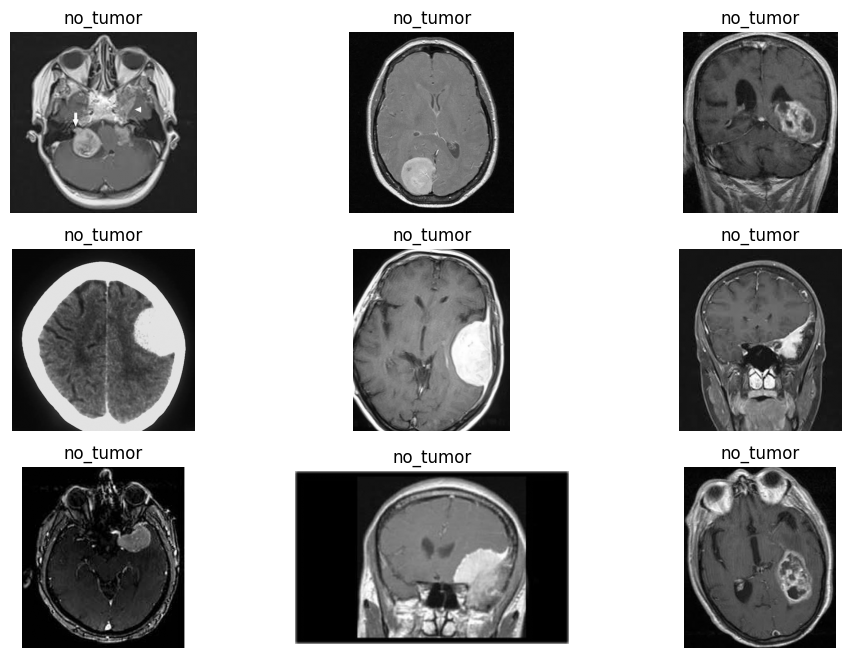

In [31]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/MyDrive/Testing/meningioma_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/meningioma_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    # Make a prediction using the SVM classifier
    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

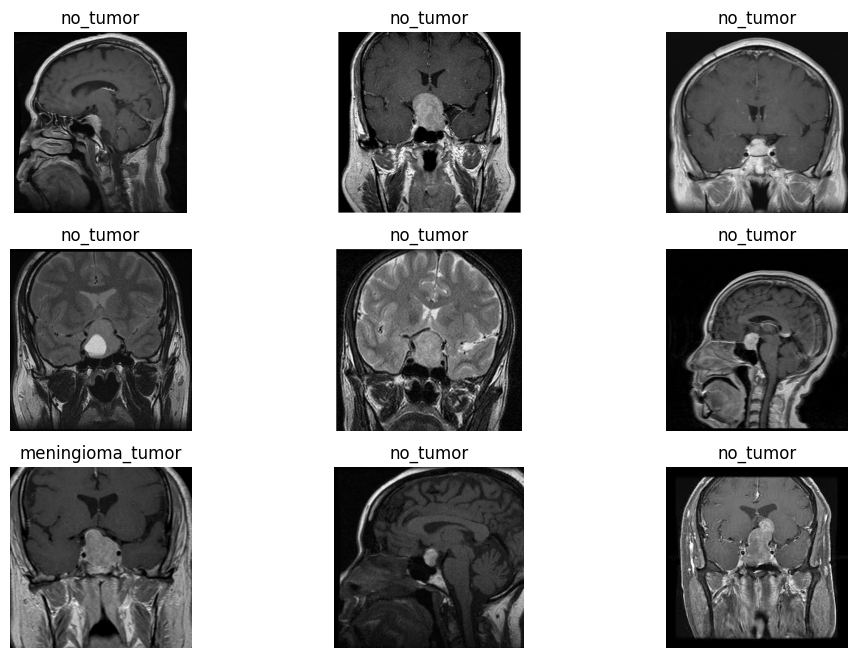

In [32]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/MyDrive/Testing/pituitary_tumor/')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    img = cv2.imread('/content/drive/MyDrive/Testing/pituitary_tumor/' + i, 0)
    img1 = cv2.resize(img, (224, 224))

    # Flatten and normalize the image
    img1 = img1.reshape(1, -1) / 255

    prediction = mlp_classifier.predict(img1)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[prediction[0]])  # or plt.title(dec[prediction[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

In [33]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
# Add channel dimension for grayscale images
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

# Create ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create data generators
train_data_generator = datagen.flow(x_train, y_train, batch_size=32)
val_data_generator = datagen.flow(x_val, y_val, batch_size=32)

In [35]:
# Get the number of augmented images in the training set
num_train_images = len(train_data_generator)

# Get the number of augmented images in the validation set
num_val_images = len(val_data_generator)

print(f"Number of augmented images in the training set: {num_train_images}")
print(f"Number of augmented images in the validation set: {num_val_images}")

Number of augmented images in the training set: 94
Number of augmented images in the validation set: 24


In [36]:
# Feature extraction and CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,332 (91.20 MB)

 Trainable params: 23,907,332 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(train_data_generator, epochs=50, validation_data=val_data_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 221ms/step - accuracy: 0.3841 - loss: 1.5921 - val_accuracy: 0.6427 - val_loss: 0.9645
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.6231 - loss: 0.9254 - val_accuracy: 0.7013 - val_loss: 0.7981
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.6781 - loss: 0.7630 - val_accuracy: 0.6613 - val_loss: 0.8336
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.7100 - loss: 0.6869 - val_accuracy: 0.7733 - val_loss: 0.6293
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.7554 - loss: 0.6032 - val_accuracy: 0.7907 - val_loss: 0.6116
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.7751 - loss: 0.5762 - val_accuracy: 0.7520 - val_loss: 0.6249
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - accuracy: 0.7875 - loss: 0.5178 - val_accuracy: 0.7600 - val_loss: 0.5889
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.8221 - loss: 0.4640 - val_accu

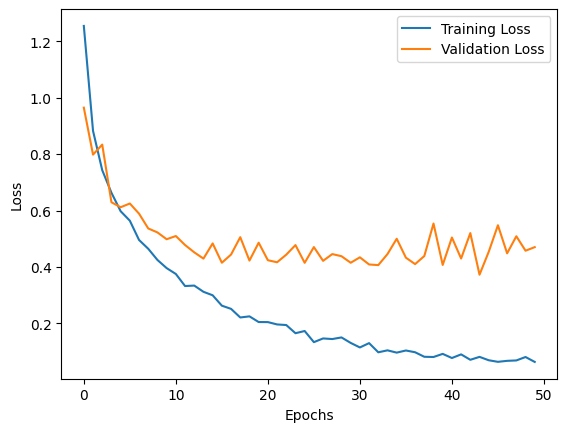

In [38]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

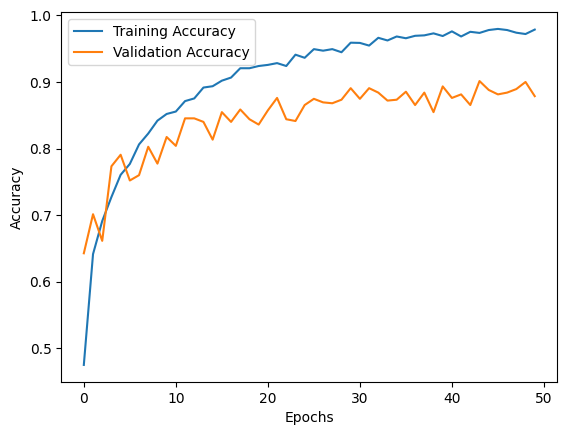

In [39]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
loss,acc = model.evaluate(train_data_generator)
print("Accuracy on Train Data:",acc)

loss,acc = model.evaluate(val_data_generator)
print("Accuracy on Test Data:",acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.9833 - loss: 0.0523
Accuracy on Train Data: 0.9799866676330566
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.8735 - loss: 0.5806
Accuracy on Test Data: 0.8866666555404663


In [42]:

from tensorflow.keras.models import save_model

save_model(model, "my_cnn_model.h5")

In [43]:
from tensorflow.keras.models import load_model
import json

# Load the .h5 model
model = load_model("/content/my_cnn_model.h5")

# Convert the model architecture to JSON
model_json = model.to_json()

# Save the architecture to a JSON file
with open("my_cnn_model.json", "w") as json_file:
    json_file.write(model_json)
